The Perceptron is an interesting algorithm that lets us classify data by seperating labeled data with a hyperplane (in low dimensions this is just a 2D line or a 3D plane). You've also seen how to implement your own Perceptron in code to classify flowers based off of some measured "features" (also known as "handcrafted" features)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
#Download url
URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
#Use URL to create a Pandas dataframe
data = pd.read_csv(URL_, header = None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


| example# | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | target name|

We consider the Iris-setosa as positive class and Iris-versicolor as negative 
Sepal length, sepal width

In [5]:
# There are 50 setosa and 50 versicolor and 50 virginica, we are just using setosa and versicolor 
# Make the dataset linearly separable
# np.where(bool, if_true, if_false)
# Convert the target names to -1 or 1 so we can train with it
data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 1, -1)

# Convert to numpy array
np_data = np.asarray(data, dtype = 'float64')

# Sepal length and sepal width
x_train = np_data[:100,:2]
# Output is the target name which we converted into either 1 or -1
y_train = np_data[:100,-1] 

Before training the perceptron, let us visualize the data

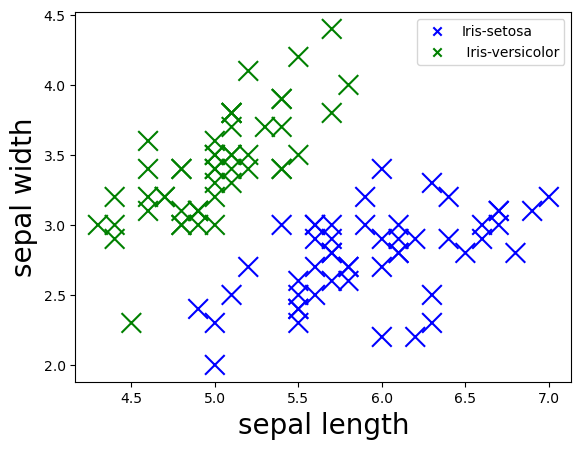

In [9]:
# Scattter plot
# Plotting first sepal length, sepal width, 
scatter = plt.scatter(x_train[:, 0], x_train[:, 1], s=200, c=np.squeeze((y_train+1)/2),  marker='x', cmap=mpl.colors.ListedColormap(["blue", "green"]))

plt.xlabel('sepal length', size=20)
plt.ylabel('sepal width', size=20)

plt.legend(scatter.legend_elements()[0], ['Iris-setosa', ' Iris-versicolor'])

In [19]:
nSamples, dim = x_train.shape
max_iterations = 10

w = np.zeros([1,dim])
b = np.zeros([1,1])

w_ave = np.zeros([1,dim])
b_ave = np.zeros([1,1])  

# We'll log the accuracy to plot later 
log_acc = []
log_acc_ave = []


#Perform a number of iterations over the dataset
for iteration in range(max_iterations):

    # Get a random index
    rnd_idx = np.random.permutation(nSamples)
    
    for indx in rnd_idx:
        
        # Get a single datapoint
        x_i = x_train[indx]
        y_i = y_train[indx]
        
        # Calculate the prediction
        # This only works because x_i is of shape (2,)
        # Gets the sign
        y_hat = np.sign(np.dot(w,x_i) + b)
        
        # Only update the Perceptron if the prediction is incorrect
        if (y_hat != y_i):
            # If prediction is not correct update the average weights

            # Accumulate weighted sum
            w_ave += c*w
            b_ave += c*b
            
            # Update the original weights and bias in the direction of where we want to go
            w += y_i*x_i
            b += y_i
                  
    # Calculate the output for every sample using the average weights a bias
    # Broadcasting occurs here
    y_hat_X_ave = np.sign(np.matmul(x_train, w_ave.T) + b_ave) 
    
    #Compare to the real labels to calculate the accuracy
    acc_ave = (y_hat_X_ave.squeeze() == y_train.squeeze()).mean()
    log_acc_ave.append(acc_ave)
    
    #Calculate the output for every sample
    y_hat_X = np.sign(np.matmul(x_train, w.T) + b) 
    #Compare to the real labels to calculate the accuracy
    acc = (y_hat_X.squeeze() == y_train.squeeze()).mean()
    log_acc.append(acc)
    
    print("Iteration {0}: Accuracy: {1:.3f}, averaged accuracy: {2:.3f}".format(iteration+1, acc, acc_ave))  

Iteration 1: Accuracy: 0.970, averaged accuracy: 0.990
Iteration 2: Accuracy: 0.910, averaged accuracy: 0.980
Iteration 3: Accuracy: 0.700, averaged accuracy: 0.980
Iteration 4: Accuracy: 0.990, averaged accuracy: 0.990
Iteration 5: Accuracy: 0.930, averaged accuracy: 0.990
Iteration 6: Accuracy: 0.980, averaged accuracy: 0.990
Iteration 7: Accuracy: 0.970, averaged accuracy: 0.990
Iteration 8: Accuracy: 0.970, averaged accuracy: 0.990
Iteration 9: Accuracy: 0.780, averaged accuracy: 0.990
Iteration 10: Accuracy: 0.990, averaged accuracy: 0.990


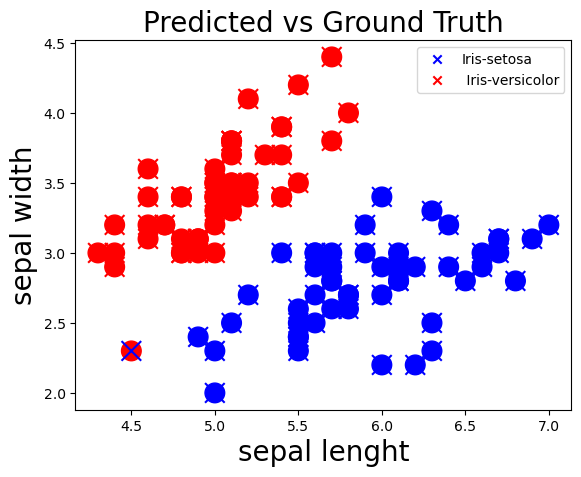

In [20]:
# Scattter plot
scatter2 = plt.scatter(x_train[:, 0], x_train[:, 1], s=200, c=np.squeeze((y_train+1)/2), marker='o', cmap=mpl.colors.ListedColormap(["blue", "red"]))

scatter = plt.scatter(x_train[:, 0], x_train[:, 1], s=200, c=np.squeeze((y_hat_X_ave+1)/2), marker='x', cmap=mpl.colors.ListedColormap(["blue", "red"]))

plt.xlabel('sepal length', size=20)
plt.ylabel('sepal width', size=20)
plt.title('Predicted vs. Ground Truth', size=20)

plt.legend(scatter.legend_elements()[0], ['Iris-setosa', ' Iris-versicolor'])

Text(0.5, 1.0, 'Average vs Vanilla Perceptron')

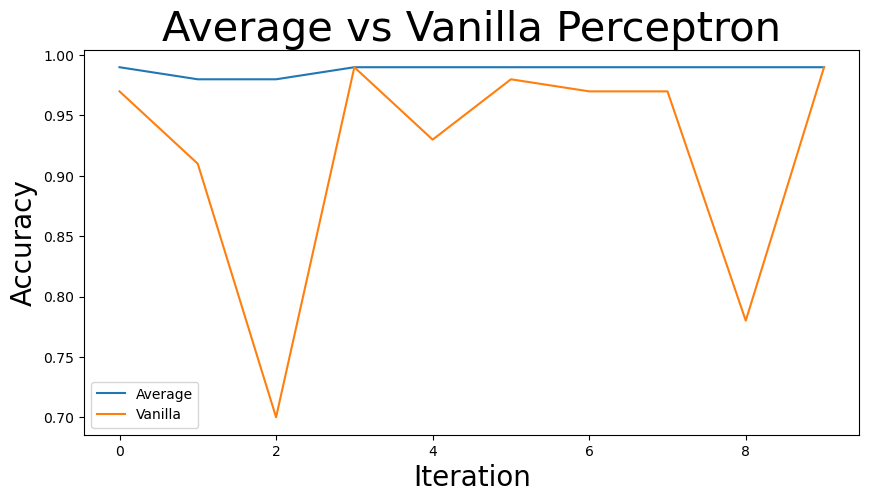

In [21]:
plt.figure(figsize = (10, 5))
plt.plot(log_acc_ave)
plt.plot(log_acc)
plt.legend(["Average", "Vanilla"])

plt.xlabel('Iteration', size=20)
plt.ylabel('Accuracy', size=20)
plt.title("Average vs Vanilla Perceptron", size=30)
# plt.savefig("perceptron.png")